# Time Series Analysis of Daily Steps Data
**Author:** Sonwabile Diko (217050276)<br>
**Date:** 23 August 2023<br>
**GitHub:** [Time Series Analysis Assignment](https://github.com/SKDiko/Jupyter-Notebook/blob/c343e7401dd7cf3505cd835c327375564c970106/mata_dataset.ipynb)<br>

## 1. Load and Read Dataset

#### 1.1 Import Libraries

In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import statsmodels.api as sm
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")

from scipy import stats
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

#### 1.2 Read and Combine CSV Files

In [2]:
# Get a list of CSV file names in the directory
csv_files = glob.glob('C:\\Users\\Administrator\\Documents\\pandas_projects\\Assignment_2\\CSV_files\\*.csv')


# Initialize an empty list to store DataFrames
data_frames = []

# Loop through each file and read it into a DataFrame, then append to the list
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    data_frames.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(data_frames, ignore_index=True)

#### 1.3 View Combined Dataframe

In [3]:
print(combined_df.to_string())

            Date  Actual  Goal
0    May 31 2022       0  8000
1     Jun 1 2022       0  8000
2     Jun 2 2022       0  8000
3     Jun 3 2022    1102  8000
4     Jun 4 2022    1254  8000
5     Jun 5 2022    1792  8000
6     Jun 6 2022    3723  8000
7     Jun 7 2022    1540  8000
8     Jun 8 2022    4388  8000
9     Jun 9 2022       0  8000
10   Jun 10 2022    5413  8000
11   Jun 11 2022    4027  8000
12   Jun 12 2022    3970  8000
13   Jun 13 2022    8372  8000
14   Jun 14 2022    6329  8000
15   Jun 15 2022    7125  8000
16   Jun 16 2022    3445  8000
17   Jun 17 2022    2866  8000
18   Jun 18 2022    2119  8000
19   Jun 19 2022    2691  8000
20   Jun 20 2022    8279  8000
21   Jun 21 2022    1863  8000
22   Jun 22 2022    3477  8000
23   Jun 23 2022    4863  8000
24   Jun 24 2022    4005  8000
25   Jun 25 2022    6105  8000
26   Jun 26 2022    5744  8000
27   Jun 27 2022    7564  8000
28    Feb 7 2023    5417  8000
29    Feb 8 2023    3397  8000
30    Feb 9 2023   15341  8000
31   Feb

## 2. Data Preparation

#### 2.1 Check Missing Values in the Dataset

In [4]:
combined_df.isnull().sum()

Date      0
Actual    0
Goal      0
dtype: int64

#### 2.2 Check Duplicate Rows in the Dataset

In [5]:
duplicate_rows = combined_df[combined_df.duplicated()]

duplicate_rows

,Date,Actual,Goal


#### 2.3 Check if Columns have Correct Datatypes

In [6]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    420 non-null    object
 1   Actual  420 non-null    int64 
 2   Goal    420 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 10.0+ KB


#### 2.4 Convert All Cells in the Date Column into Dates

In [7]:
#Convert Date column into date datatype
combined_df['Date'] = pd.to_datetime(combined_df['Date'])

#Display the datatpes
combined_df.dtypes

Date      datetime64[ns]
Actual             int64
Goal               int64
dtype: object

#### 2.5 Replace 0 Values in Actual Steps Column with Average of the Actual Steps

In [8]:
# Calculate the average of Actual steps column
average = combined_df["Actual"].mean().round(0)

# Replace all 0 values with the average in the Actual steps column
combined_df["Actual"].replace(to_replace=0, value=average, inplace=True)

print(combined_df.to_string())

          Date  Actual  Goal
0   2022-05-31    5674  8000
1   2022-06-01    5674  8000
2   2022-06-02    5674  8000
3   2022-06-03    1102  8000
4   2022-06-04    1254  8000
5   2022-06-05    1792  8000
6   2022-06-06    3723  8000
7   2022-06-07    1540  8000
8   2022-06-08    4388  8000
9   2022-06-09    5674  8000
10  2022-06-10    5413  8000
11  2022-06-11    4027  8000
12  2022-06-12    3970  8000
13  2022-06-13    8372  8000
14  2022-06-14    6329  8000
15  2022-06-15    7125  8000
16  2022-06-16    3445  8000
17  2022-06-17    2866  8000
18  2022-06-18    2119  8000
19  2022-06-19    2691  8000
20  2022-06-20    8279  8000
21  2022-06-21    1863  8000
22  2022-06-22    3477  8000
23  2022-06-23    4863  8000
24  2022-06-24    4005  8000
25  2022-06-25    6105  8000
26  2022-06-26    5744  8000
27  2022-06-27    7564  8000
28  2023-02-07    5417  8000
29  2023-02-08    3397  8000
30  2023-02-09   15341  8000
31  2023-02-10    8071  8000
32  2023-02-11    1392  8000
33  2023-02-12

#### 2.6 Indexing with Time Series Data

In [9]:
#Set index
combined_df.set_index('Date',inplace=True)

## 3. Exploratory Data Analysis

### 3.1 Visualize the Time Series Data

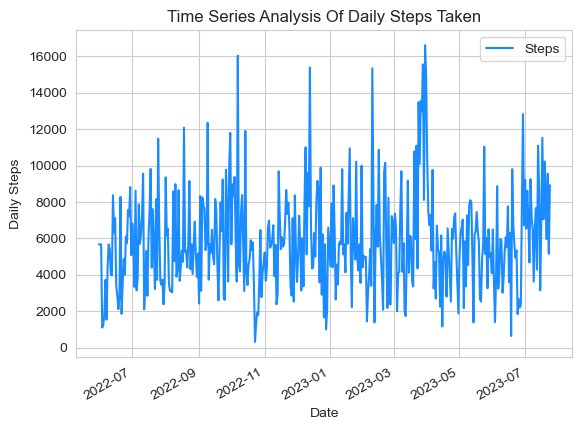

In [10]:
sns.set_style("whitegrid")

# Create the plot
combined_df['Actual'].plot(
    title='Time Series Analysis Of Daily Steps Taken',
    xlabel='Date',
    ylabel='Daily Steps',
    style={"Actual": "#1a8cff"}
)

plt.legend(['Steps']);

# Show the plot
plt.show()

### 3.2 Calculate Descriptive Statistics

#### 3.2.1 Descriptive Statistics Summary
The <b>describe()</b> function is used to get a summary of the basic statistical details of the daily steps time series.

In [11]:
print("\033[1mDaily steps descriptive statistics summary:\033[0m")
round(combined_df['Actual'].describe(), 2)

Daily steps descriptive statistics summary:


count      420.00
mean      5849.76
std       2749.25
min        316.00
25%       3877.00
50%       5654.50
75%       7349.00
max      16611.00
Name: Actual, dtype: float64

#### 3.2.2 Minimum Value

In [12]:
print("\033[1mMinimum Value:\033[0m The minimum number of steps taken in a day is " + str(combined_df['Actual'].min()) + ".")
print("This could indicate a day when the individual was very inactive.")

Minimum Value: The minimum number of steps taken in a day is 316.
This could indicate a day when the individual was very inactive.


#### 3.2.3 First Quartile

In [13]:
print("\033[1mFirst Quartile:\033[0m 25% of the days, the individual walked less than or equal to " +
      str(combined_df['Actual'].quantile(q=0.25)) + " steps.")
print("This could indicate the lower end of the typical daily steps for the individual.")

First Quartile: 25% of the days, the individual walked less than or equal to 3877.0 steps.
This could indicate the lower end of the typical daily steps for the individual.


#### 3.2.4 Second Quartile (Median)

In [14]:
print("\033[1mSecond Quartile:\033[0m Half of the days, the individual walked less than or equal to " +
      str(combined_df['Actual'].quantile(q=0.5).round(0)) + " steps.")
print("This could indicate the average daily steps for the individual.")

Second Quartile: Half of the days, the individual walked less than or equal to 5654.0 steps.
This could indicate the average daily steps for the individual.


#### 3.2.5 Third Quartile

In [15]:
print("\033[1mThird Quartile:\033[0m 75% of the days, the individual walked less than or equal to " +
      str(combined_df['Actual'].quantile(q=0.75)) + " steps.")
print("This could indicate the upper end of the typical daily steps for the individual.")

Third Quartile: 75% of the days, the individual walked less than or equal to 7349.0 steps.
This could indicate the upper end of the typical daily steps for the individual.


#### 3.2.6 Maximum Value

In [16]:
print("\033[1mMaximum Value:\033[0m The maximum number of steps taken in a day is " + str(combined_df['Actual'].max()) + ".")
print("This could indicate a day when the individual was very active or participated in some special event or activity.")

Maximum Value: The maximum number of steps taken in a day is 16611.
This could indicate a day when the individual was very active or participated in some special event or activity.


#### 3.2.7 Mean

In [17]:
print("\033[1mMean:\033[0m On average, the individual walked " + str(round(combined_df['Actual'].mean(), 0)) + " steps.")
print("This could indicate the overall level of physical activity for the individual.")

Mean: On average, the individual walked 5850.0 steps.
This could indicate the overall level of physical activity for the individual.


#### 3.2.8 Standard Deviation

In [18]:
print("\033[1mStandard Deviation:\033[0m The standard deviation is " + str(round(combined_df['Actual'].std(), 2)) +".")
print("This means that most of the data points are within " + str(round(combined_df['Actual'].std(), 2)) + " steps from the mean.")

Standard Deviation: The standard deviation is 2749.25.
This means that most of the data points are within 2749.25 steps from the mean.


#### 3.2.9 Mode

In [19]:
print("\033[1mMode:\033[0m The mode is", ', '.join(map(str, combined_df['Actual'].mode().tolist())) +
      ". This is the most common number of steps that the individual walked in a day.")

Mode: The mode is 5674. This is the most common number of steps that the individual walked in a day.


#### 3.2.10 Range

In [20]:
print("\033[1mRange:\033[0m The Range is " + str(combined_df['Actual'].max() - combined_df['Actual'].min()) +
      ". This is the difference between the maximum and minimum number of steps walked by the individual in a day.")

Range: The Range is 16295. This is the difference between the maximum and minimum number of steps walked by the individual in a day.


#### 3.2.11 Interquartile Range

In [21]:
print("\033[1mInterquartile Range:\033[0m The difference between the third and first quartiles in the dataset is " 
      + str(combined_df['Actual'].quantile(q=0.75) - combined_df['Actual'].quantile(q=0.25)) + " steps.")
print("This could indicate how spread out or diverse the middle 50% of the data set is, excluding any outliers or extreme values.")

Interquartile Range: The difference between the third and first quartiles in the dataset is 3472.0 steps.
This could indicate how spread out or diverse the middle 50% of the data set is, excluding any outliers or extreme values.


#### 3.2.12 Variance

In [22]:
print("\033[1mVariance:\033[0m The variance is "+ str(round(combined_df['Actual'].var(), 2)) +
      ", This is a measure of how spread out the data is.")

Variance: The variance is 7558379.25, This is a measure of how spread out the data is.


#### 3.2.13 Count

In [23]:
print("\033[1mCount:\033[0m The total number of data values in the dataset is " + str(combined_df['Actual'].count()))

Count: The total number of data values in the dataset is 420


#### 3.2.14 Skewness

In [24]:
print("\033[1mSkewness:\033[0m The skewness is "+ str(round(combined_df['Actual'].skew(), 2)) +
      ", which indicates that the data is positively skewed.")
print("This means that the tail on the right side of the distribution is longer than the tail on the left side.")

Skewness: The skewness is 0.9, which indicates that the data is positively skewed.
This means that the tail on the right side of the distribution is longer than the tail on the left side.


#### 3.2.15 Outliers

In [25]:
print("\033[1mOutliers:\033[0m The following is actual steps outliers using Z-score method.")
print("These indicate some unusual or exceptional days for the individual, such as days when they were extremely active or inactive.")
combined_df['Actual'][abs(zscore(combined_df['Actual'])) > 2]

Outliers: The following is actual steps outliers using Z-score method.
These indicate some unusual or exceptional days for the individual, such as days when they were extremely active or inactive.


Date
2023-02-09    15341
2023-03-24    13483
2023-03-26    13556
2023-03-27    12984
2023-03-28    15553
2023-03-30    16611
2023-03-31    14905
2023-06-29    12829
2023-07-17    11524
2022-07-25    11480
2022-08-18    12084
2022-09-09    12348
2022-09-30    11797
2022-10-07    16035
2022-10-14    11902
2022-10-23      316
2022-12-13    15390
Name: Actual, dtype: int64

#### 3.2.16 Box Plot

The Box and Whiskers diagram shows the outliers and that the data is positively skewed.

Text(0.5, 1.0, 'Box and Whiskers of Time Series Analysis of Daily Steps Taken')

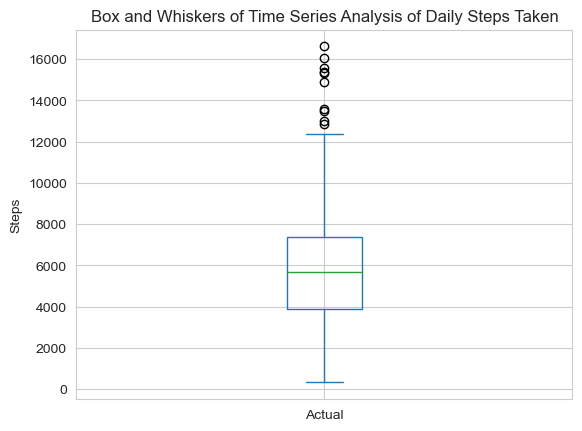

In [26]:
combined_df['Actual'].plot.box();
plt.ylabel('Steps');
plt.title("Box and Whiskers of Time Series Analysis of Daily Steps Taken")

##  4. Seasonal Decomposition

* <b>Additive and multiplicative seasonal decomposition</b> are two different methods of decomposing a time series into its constituent components such as trend, seasonality, and residual.
* To better understand the time series, both methods will be used to experiment and see which one gives the best results on how the trend, seasonality, and residual interact with each other.

### 4.1 Additive Seasonal Decomposition

#### 4.1.1 Additive Trend Plot

* The trend is the general direction of the time series over time. It can be increasing, decreasing, or constant.
* In this case, the trend seems to be slightly increasing, with some fluctuations and peaks, possibly indicating variations over time.

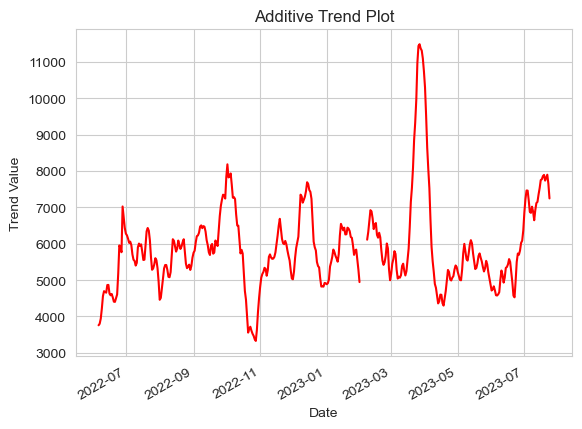

In [27]:
# Perform seasonal decomposition
additive = seasonal_decompose(combined_df['Actual'], model='additive', period=12)

# Create the plot
additive_fig = additive.trend.plot(title='Additive Trend Plot', xlabel='Date', ylabel='Trend Value', color="red")

# Show the plot
plt.show()

#### 4.1.2 Additive Seasonal Plot

* The seasonal component of a time series is the pattern that repeats itself over a fixed period of time.
* In this case, there appears to be some seasonality in the data with higher values occurring at certain times of the year.

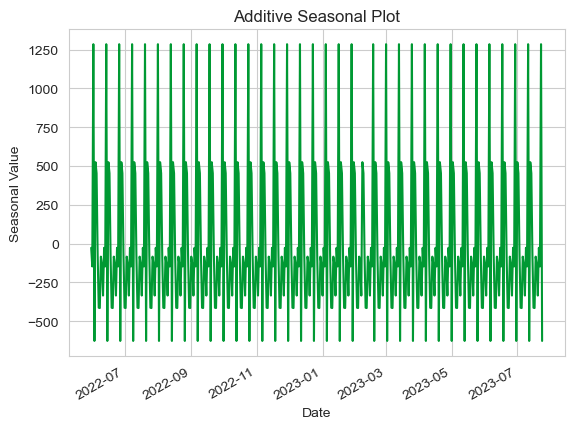

In [28]:
# Create the plot
additive_fig = additive.seasonal.plot(title='Additive Seasonal Plot', xlabel='Date', ylabel='Seasonal Value', color="#009933")

# Show the plot
plt.show()

#### 4.1.3 Additive Residual Plot

* The residual component shows the random or irregular variation that remains after removing the trend and seasonality from the data.
* In this case, the residual seems to be relatively small, except for some outliers or extreme values.

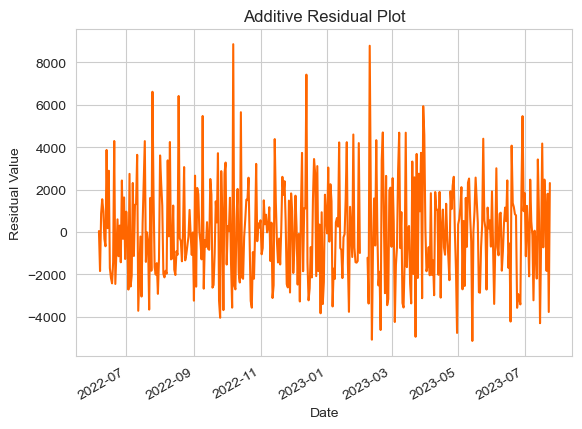

In [29]:
# Create the plot
additive_fig = additive.resid.plot(title='Additive Residual Plot', xlabel='Date', ylabel='Residual Value', color="#ff6600")

# Show the plot
plt.show()

### 4.2 Multiplicative Seasonal Decomposition

#### 4.2.1 Multiplicative Trend Plot

* The trend is the general direction of the time series over time. It can be increasing, decreasing, or constant.
* In this case, the trend seems to be slightly increasing, with some fluctuations and peaks, possibly indicating variations over time.

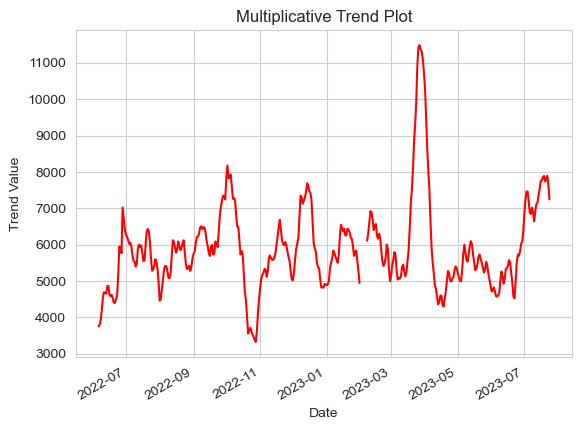

In [30]:
# Perform seasonal decomposition
multiplicative = seasonal_decompose(combined_df['Actual'], model='multiplicative', period=12)

# Create the plot
multiplicative_fig = multiplicative.trend.plot(title='Multiplicative Trend Plot', xlabel='Date', ylabel='Trend Value', color="red")

# Show the plot
plt.show()

#### 4.2.2 Multiplicative Seasonal Plot

* The seasonal component of a time series is the pattern that repeats itself over a fixed period of time.
* In this case, there appears to be some seasonality in the data with higher values occurring at certain times of the year.

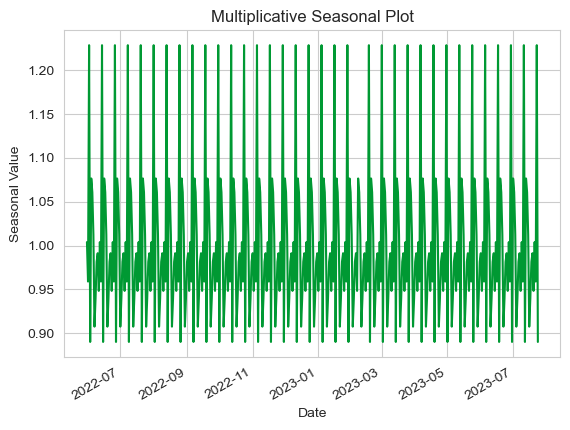

In [31]:
# Create the plot
multiplicative_fig = multiplicative.seasonal.plot(title='Multiplicative Seasonal Plot', xlabel='Date', ylabel='Seasonal Value', color="#009933")

# Show the plot
plt.show()

#### 4.2.3 Multiplicative Residual Plot

* The residual component shows the random or irregular variation that remains after removing the trend and seasonality from the data.
* In this case, the residual seems to be relatively small, except for some outliers or extreme values.

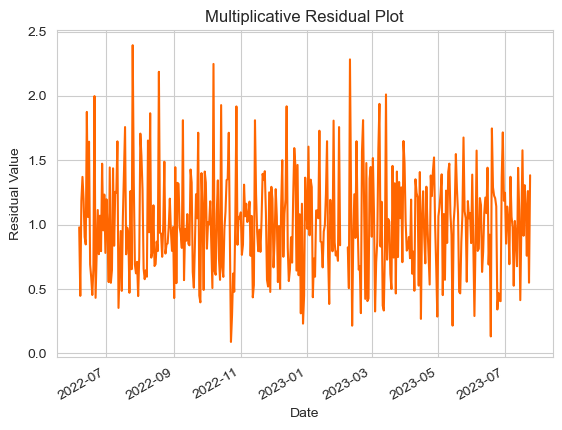

In [32]:
# Create the plot
multiplicative_fig = multiplicative.resid.plot(title='Multiplicative Residual Plot', xlabel='Date', ylabel='Residual Value', color="#ff6600")

# Show the plot
plt.show()

### 4.3 Comparism Between Additive and Multiplicative Seasonal Decomposition

* Both additive and multiplicative seasonal decompositions show similar results on the trend, seasonality, and residual diagrams.

## 5.  Test if the Data is Stationary

### 5.1 Augmented Dickey-Fuller Test
* The <b>Augmented Dickey-Fuller (ADF)</b> test is a statistical test that checks if a time series is stationary or not. 

In [33]:
# Perform Augmented Dickey-Fuller test
result = adfuller(combined_df['Actual'])

#Hypothesis
print('\033[1mHypothesis:\033[0m')
print('H0: It is non-stationary')
print('H1: It is stationary')
print('-' * 90)

# Extract and print the results
print('\033[1mADF Test Statistic:\033[0m ', result[0])
print('\033[1mp-value:\033[0m ', result[1])
print('\033[1mNumber of lags used:\033[0m ', result[2])
print('\033[1mNumber of observations:\033[0m ', result[3])
print('\033[1mCritical Values:\033[0m ')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

print('-' * 90)
print('\033[1mIs the data stationary:\033[0m')

if result[1] <= 0.05:
    print('Yes, Reject the null hypothesis (H0), the data does not have a unit root and is stationary.')
else:
    print('No, Accept the null hypothesis (H0), the data has a unit root and is non-stationary.')

Hypothesis:
H0: It is non-stationary
H1: It is stationary
------------------------------------------------------------------------------------------
ADF Test Statistic:  -5.388111945651394
p-value:  3.587484752234083e-06
Number of lags used:  18
Number of observations:  401
Critical Values: 
	1%: -3.4467631030732506
	5%: -2.868774682311516
	10%: -2.570623877774392
------------------------------------------------------------------------------------------
Is the data stationary:
Yes, Reject the null hypothesis (H0), the data does not have a unit root and is stationary.


### 5.2 Differencing
* Differencing is not peformed since data is already stationary.

## 6. Model selection and Forecasting

The following methods will be used to find the best model parameters for both Arima and SARIMA:<br>
1. Manual Prediction (Auto Regressive Model)<br>
2. Auto Estimation (Auto ARIMA)<br>
3. Itertools Prediction<br>
4. Runtime Configuration Parameters (RCP) Prediction

### 6.1 Manual  Prediction (Auto Regressive Model)
* An <b>autoregressive model (AR)</b> is a statistical model that predicts future values of a time series based on its past values.<br>
* The AR model assumes that the current value of the time series is linearly related to its past values.

#### Auto Correlation Function (ACF) and Partial Auto Correlation Function (PACF) Plot
1. The <b>Auto Correlation Function (ACF)</b> is a statistical tool used to identify any autocorrelation in the data. This is used to identify the presence of seasonality in a time series.<br>
2. The <b>partial autocorrelation function (PACF)</b> is a statistical measure of the correlation between a time series and its past values, after removing the effects of the intervening values. It is used to identify the order of an autoregressive model.

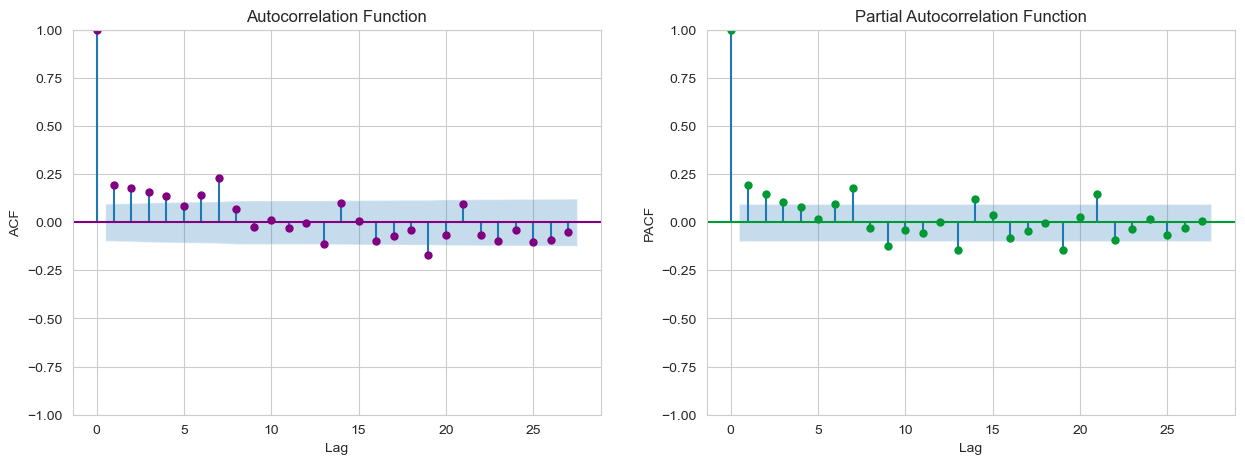

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

#Auto Correlation Function (ACF) Plot
plot_acf(combined_df['Actual'], ax=ax[0], color='#800080')
ax[0].set_xlabel('Lag')
ax[0].set_ylabel('ACF')
ax[0].set_title('Autocorrelation Function')


# Partial Auto Correlation Function (PACF) Plot
plot_pacf(combined_df['Actual'],ax=ax[1], color='#009933')
ax[1].set_xlabel('Lag')
ax[1].set_ylabel('PACF')
ax[1].set_title('Partial Autocorrelation Function')

plt.show()

### 6.1.1 ARIMA Manual Prediction

In [35]:
# Enter estimated parameters
ARIMA_manual = ARIMA(combined_df['Actual'], order=(3, 1, 3))

# Fit the ARIMA model
ARIMA_manual_fit = ARIMA_manual.fit()

# ARIMA model summary
print(ARIMA_manual_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 Actual   No. Observations:                  420
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -3900.474
Date:                Tue, 22 Aug 2023   AIC                           7814.947
Time:                        06:17:03   BIC                           7843.213
Sample:                             0   HQIC                          7826.120
                                - 420                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2591      0.123      2.103      0.035       0.018       0.501
ar.L2         -0.7894      0.110     -7.181      0.000      -1.005      -0.574
ar.L3          0.1123      0.068      1.651      0.0

#### Residuals and Density Plot (ARIMA Manual Prediction)

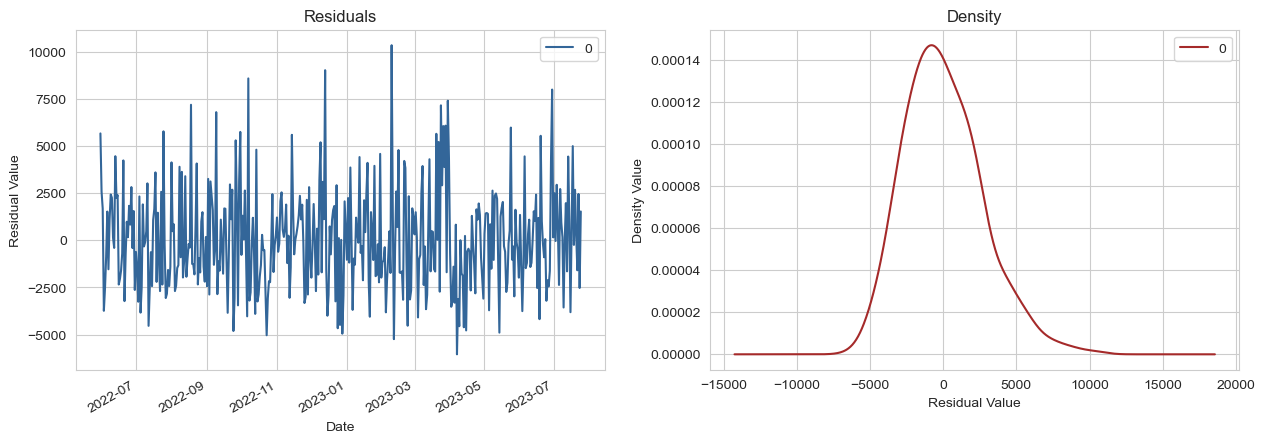

In [36]:
residuals = pd.DataFrame(ARIMA_manual_fit.resid)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

#Residuals Plot
residuals.plot(title="Residuals", ax=ax[0], color='#336699')
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Residual Value")

#Density Plot
residuals.plot(title="Density", kind="kde", ax=ax[1], color='#a52a2a')
ax[1].set_xlabel("Residual Value")
ax[1].set_ylabel("Density Value")

plt.show()

#### ARIMA Manual Prediction Forecasting

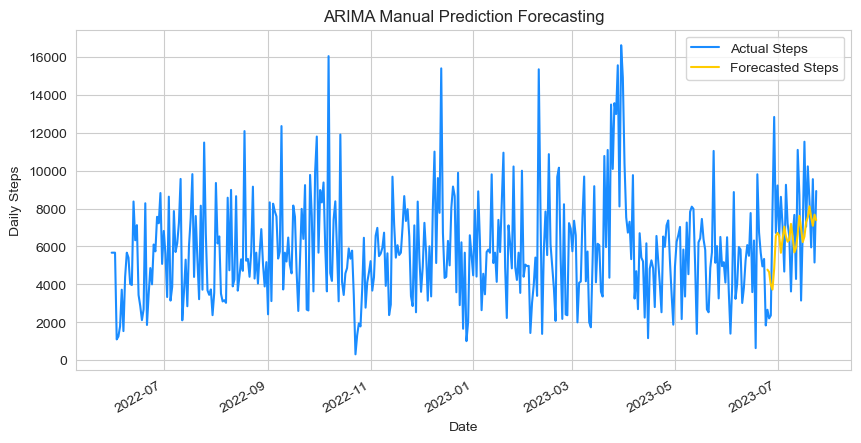

In [37]:
ARIMA_manual_df = combined_df.copy()
# Make predictions
ARIMA_manual_df['ARIMA_manual_predicted'] = ARIMA_manual_fit.predict(start=pd.to_datetime('2023-06-25'), end=combined_df.index.max())

# Create the plot
ARIMA_manual_df[['Actual','ARIMA_manual_predicted']].plot(figsize=(10,5), color=['#1a8cff', '#ffcc00'])

plt.xlabel('Date')
plt.ylabel('Daily Steps');
plt.title("ARIMA Manual Prediction Forecasting")
plt.legend(['Actual Steps', 'Forecasted Steps']);
plt.show()

#### ARIMA Manual Prediction Statistics

In [38]:
ARIMA_manual_df['ARIMA_manual_predicted'].describe()

count      30.000000
mean     6401.016102
std      1098.308567
min      3727.495204
25%      6008.863686
50%      6544.960986
75%      7166.420088
max      8116.247665
Name: ARIMA_manual_predicted, dtype: float64

#### ARIMA Manual Prediction Error Test

In [39]:
# Drop rows with NaN values
ARIMA_manual_df.dropna(subset=['ARIMA_manual_predicted'], inplace=True)

# Calculate the errors
ARIMA_manual_MSE = mean_squared_error(ARIMA_manual_df['Actual'], ARIMA_manual_df['ARIMA_manual_predicted'])
ARIMA_manual_RMSE = np.sqrt(ARIMA_manual_MSE)
ARIMA_manual_MAE = mean_absolute_error(ARIMA_manual_df['Actual'], ARIMA_manual_df['ARIMA_manual_predicted'])
ARIMA_manual_MAPE = mean_absolute_percentage_error(ARIMA_manual_df['Actual'], ARIMA_manual_df['ARIMA_manual_predicted'])

# Print the error results
print(f'Mean Squared Error: {ARIMA_manual_MSE:.2f}')
print(f'Root Mean Squared Error: {ARIMA_manual_RMSE:.2f}')
print(f'Mean Absolute Error: {ARIMA_manual_MAE:.2f}')
print(f'Mean Absolute Percentage Error: {ARIMA_manual_MAPE:.2%}')

Mean Squared Error: 7629569.98
Root Mean Squared Error: 2762.17
Mean Absolute Error: 2148.78
Mean Absolute Percentage Error: 36.16%


### 6.1.2 SARIMA Manual Prediction

In [40]:
# Enter the Estimated Model Parameters
SARIMA_manual = sm.tsa.statespace.SARIMAX(combined_df['Actual'], order=(1, 1, 5), seasonal_order=(0, 1, 1, 12))

# Fit the ARIMA model
SARIMA_manual_fit = SARIMA_manual.fit()

# SARIMA model summary
print(SARIMA_manual_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                               Actual   No. Observations:                  420
Model:             SARIMAX(1, 1, 5)x(0, 1, [1], 12)   Log Likelihood               -3827.006
Date:                              Tue, 22 Aug 2023   AIC                           7670.011
Time:                                      06:17:16   BIC                           7702.082
Sample:                                           0   HQIC                          7682.703
                                              - 420                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0000      0.306     -3.269      0.001      -1.600      -0.400
ma.L1          0.14

#### Residual, Histogram and Density, Normal Q-Q, and Correlogram Plot (SARIMA Manual Prediction)

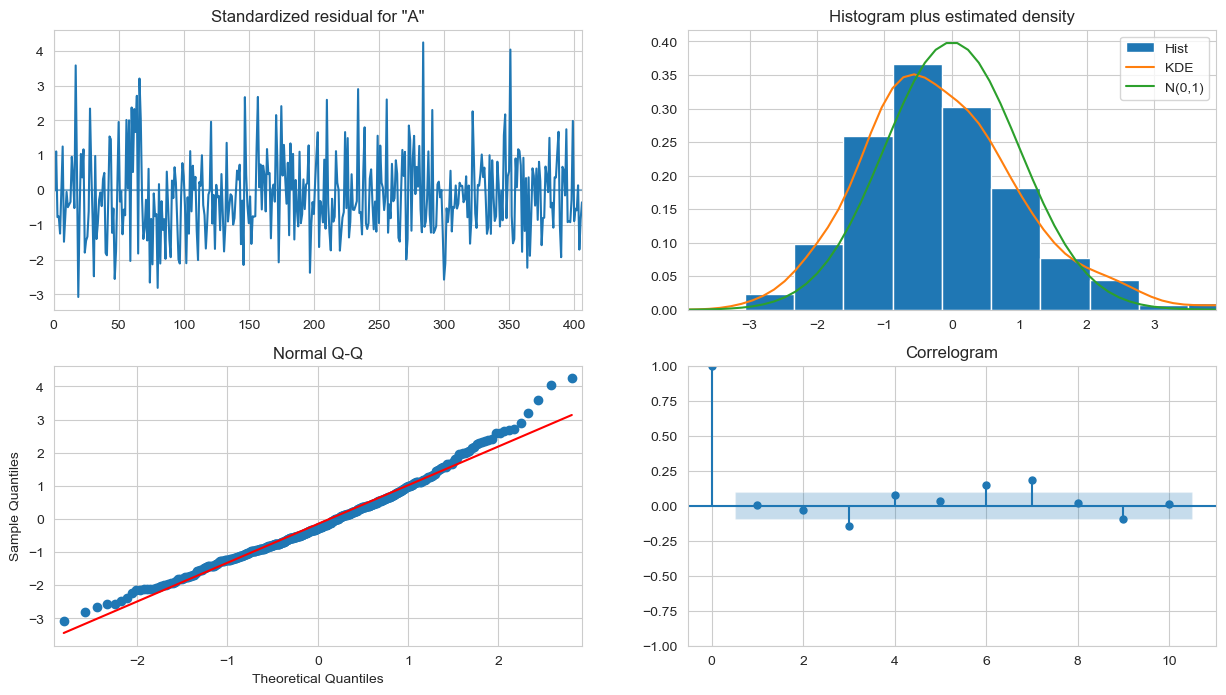

In [41]:
SARIMA_manual_fit.plot_diagnostics(figsize=(15, 8))
plt.show()

#### SARIMA Manual Prediction Forecasting

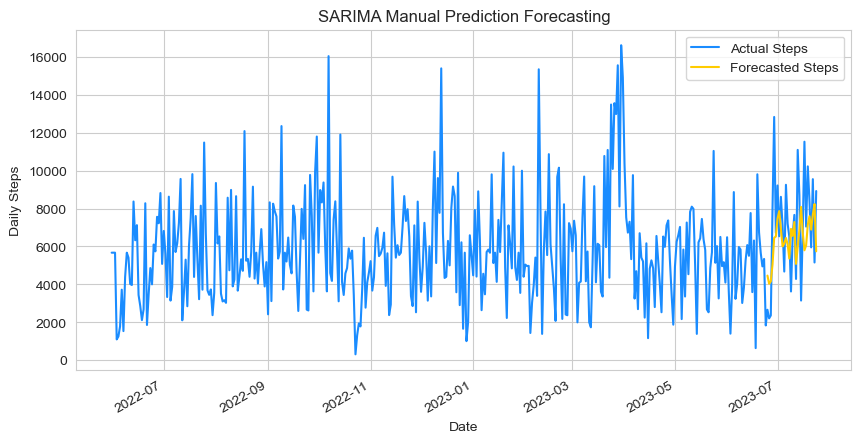

In [42]:
SARIMA_manual_df = combined_df.copy()

# Make predictions
SARIMA_manual_df['SARIMA_manual_predicted'] = SARIMA_manual_fit.predict(start=pd.to_datetime('2023-06-25'), end=combined_df.index.max())

# Create the plot
SARIMA_manual_df[['Actual','SARIMA_manual_predicted']].plot(figsize=(10,5), color=['#1a8cff', '#ffcc00'])

plt.xlabel('Date')
plt.ylabel('Daily Steps');
plt.title("SARIMA Manual Prediction Forecasting")
plt.legend(['Actual Steps', 'Forecasted Steps']);
plt.show()

#### SARIMA Manual Prediction Statistics

In [43]:
SARIMA_manual_df['SARIMA_manual_predicted'].describe()

count      30.000000
mean     6390.829007
std      1107.201239
min      4038.383840
25%      5844.417452
50%      6491.958180
75%      7095.819766
max      8237.760565
Name: SARIMA_manual_predicted, dtype: float64

#### SARIMA Manual Prediction Error Test

In [44]:
# Drop rows with NaN values
SARIMA_manual_df.dropna(subset=['SARIMA_manual_predicted'], inplace=True)

# Calculate the errors
SARIMA_manual_MSE = mean_squared_error(SARIMA_manual_df['Actual'], SARIMA_manual_df['SARIMA_manual_predicted'])
SARIMA_manual_RMSE = np.sqrt(SARIMA_manual_MSE)
SARIMA_manual_MAE = mean_absolute_error(SARIMA_manual_df['Actual'], SARIMA_manual_df['SARIMA_manual_predicted'])
SARIMA_manual_MAPE = mean_absolute_percentage_error(SARIMA_manual_df['Actual'], SARIMA_manual_df['SARIMA_manual_predicted'])

# Print the error results
print(f'Mean Squared Error: {SARIMA_manual_MSE:.2f}')
print(f'Root Mean Squared Error: {SARIMA_manual_RMSE:.2f}')
print(f'Mean Absolute Error: {SARIMA_manual_MAE:.2f}')
print(f'Mean Absolute Percentage Error: {SARIMA_manual_MAPE:.2%}')

Mean Squared Error: 7112199.16
Root Mean Squared Error: 2666.87
Mean Absolute Error: 2112.31
Mean Absolute Percentage Error: 35.26%


### 6.2  Auto Estimation (Auto ARIMA)
* <b>Auto ARIMA</b> is a function used in time series analysis to automatically discover the optimal order for an ARIMA model.<br>
* ARIMA models have three main parameters: p, d, and q, which represent the order of the autoregressive, differencing, and moving average components, respectively.<br>
* Additionally, ARIMA models can also handle seasonal data by adding another set of parameters: P, D, and Q, which represent the order of the seasonal autoregressive, differencing, and moving average components, respectively.

#### Find Model Parameters Using Auto Estimation

In [45]:
# Find parameters
auto_arima_para = auto_arima(
    combined_df['Actual'],
    start_p=1,
    start_q=1,
    test='adf',
    max_p=3,
    max_q=3, 
    m=12, 
    d=None, 
    seasonal=True,
    start_P=0,
    D=0,
    trace=True,
    error_action='ignore',  
    suppress_warnings=True, 
    stepwise=True
)

# Print best model parameters
print("Order:", auto_arima_para.order)
print("Seasonal Order:", auto_arima_para.seasonal_order)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=7832.347, Time=0.50 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=7846.937, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=7835.198, Time=0.55 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=7838.826, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=8563.838, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=7830.484, Time=0.19 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=7832.483, Time=0.63 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=7825.838, Time=2.35 sec
 ARIMA(1,0,1)(2,0,1)[12] intercept   : AIC=7827.551, Time=5.90 sec
 ARIMA(1,0,1)(1,0,2)[12] intercept   : AIC=inf, Time=5.74 sec
 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=7834.346, Time=1.00 sec
 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=7834.288, Time=1.86 sec
 ARIMA(1,0,1)(2,0,2)[12] intercept   : AIC=7825.172, Time=7.38 sec
 ARIMA(0,0,1)(2,0,2)[12] intercept   : AIC=7844.569, Time=5.16 sec
 ARIMA(1,0,0)(2,0,2)[12]

### 6.2.1 ARIMA Auto Estimation

In [46]:
# Enter estimated parameters
ARIMA_auto = ARIMA(combined_df['Actual'], order=(1,0,1))

# Fit the ARIMA model
ARIMA_auto_fit = ARIMA_auto.fit()

# ARIMA model summary
print(ARIMA_auto_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 Actual   No. Observations:                  420
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -3904.300
Date:                Tue, 22 Aug 2023   AIC                           7816.600
Time:                        06:18:26   BIC                           7832.761
Sample:                             0   HQIC                          7822.988
                                - 420                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5849.7641    304.502     19.211      0.000    5252.952    6446.577
ar.L1          0.8625      0.069     12.540      0.000       0.728       0.997
ma.L1         -0.7140      0.095     -7.496      0.0

#### Residuals and Density Plot (ARIMA Auto Estimation)

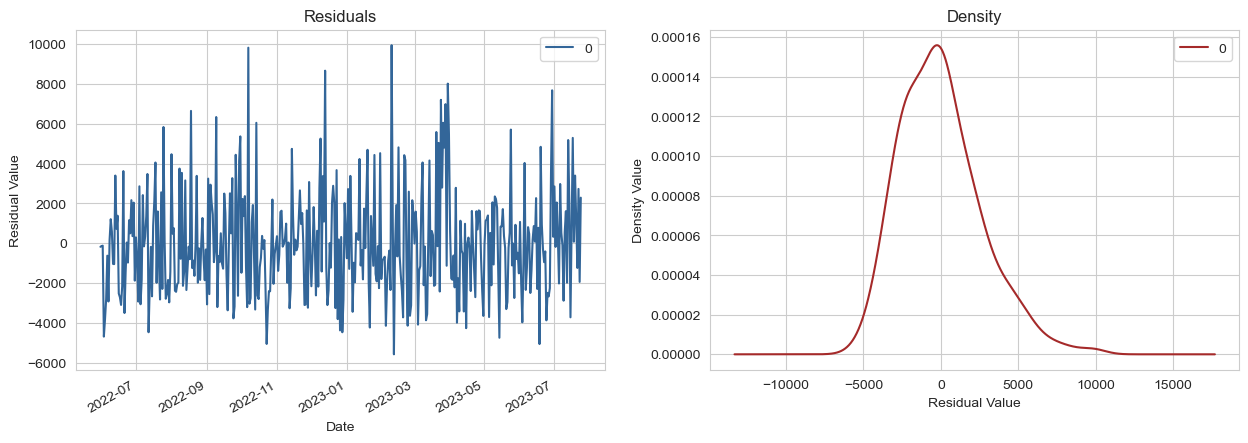

In [47]:
residuals = pd.DataFrame(ARIMA_auto_fit.resid)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

#Residuals Plot
residuals.plot(title="Residuals", ax=ax[0], color='#336699')
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Residual Value")

#Density Plot
residuals.plot(title="Density", kind="kde", ax=ax[1], color='#a52a2a')
ax[1].set_xlabel("Residual Value")
ax[1].set_ylabel("Density Value")

plt.show()

#### ARIMA Auto Estimation Forecasting

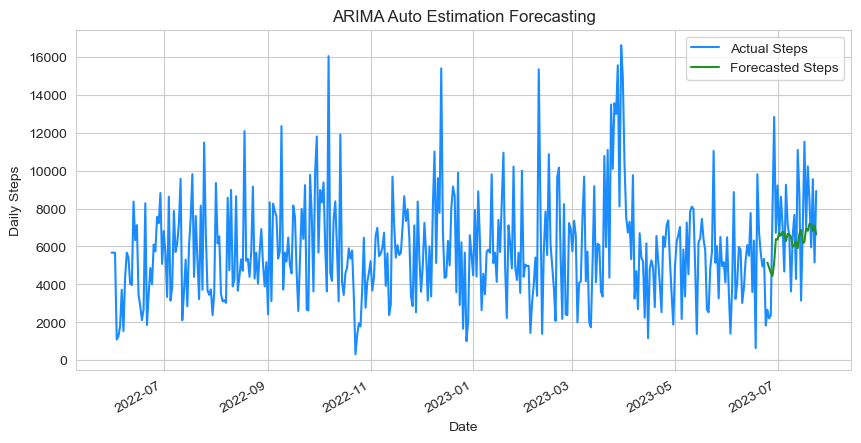

In [48]:
ARIMA_auto_df = combined_df.copy()

# Make predictions
ARIMA_auto_df['ARIMA_auto_predicted'] = ARIMA_auto_fit.predict(start=pd.to_datetime('2023-06-25'), end=combined_df.index.max())

# Create the plot
ARIMA_auto_df[['Actual','ARIMA_auto_predicted']].plot(figsize=(10,5), color=['#1a8cff', '#248f24'])

plt.xlabel('Date')
plt.ylabel('Daily Steps');
plt.title("ARIMA Auto Estimation Forecasting")
plt.legend(['Actual Steps', 'Forecasted Steps']);
plt.show()

#### ARIMA Auto Estimation Statistics

In [49]:
ARIMA_auto_df['ARIMA_auto_predicted'].describe()

count      30.000000
mean     6291.542631
std       742.137282
min      4449.917693
25%      6083.750655
50%      6539.565206
75%      6761.881032
max      7197.444803
Name: ARIMA_auto_predicted, dtype: float64

#### ARIMA Auto Estimation Error Test

In [50]:
# Drop rows with NaN values
ARIMA_auto_df.dropna(subset=['ARIMA_auto_predicted'], inplace=True)

# Calculate the errors
ARIMA_auto_MSE = mean_squared_error(ARIMA_auto_df['Actual'], ARIMA_auto_df['ARIMA_auto_predicted'])
ARIMA_auto_RMSE = np.sqrt(ARIMA_auto_MSE)
ARIMA_auto_MAE = mean_absolute_error(ARIMA_auto_df['Actual'], ARIMA_auto_df['ARIMA_auto_predicted'])
ARIMA_auto_MAPE = mean_absolute_percentage_error(ARIMA_auto_df['Actual'], ARIMA_auto_df['ARIMA_auto_predicted'])

# Print the error results
print(f'Mean Squared Error: {ARIMA_auto_MSE:.2f}')
print(f'Root Mean Squared Error: {ARIMA_auto_RMSE:.2f}')
print(f'Mean Absolute Error: {ARIMA_auto_MAE:.2f}')
print(f'Mean Absolute Percentage Error: {ARIMA_auto_MAPE:.2%}')

Mean Squared Error: 7805934.58
Root Mean Squared Error: 2793.91
Mean Absolute Error: 2223.62
Mean Absolute Percentage Error: 37.46%


### 6.2.2 SARIMA Auto Estimation

In [51]:
# Enter the Estimated Model Parameters
SARIMA_auto = sm.tsa.statespace.SARIMAX(combined_df['Actual'], order=(1, 0, 1), seasonal_order=(2, 0, 2, 12))

# Fit the ARIMA model
SARIMA_auto_fit = SARIMA_auto.fit()

# SARIMA model summary
print(SARIMA_auto_fit.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                  Actual   No. Observations:                  420
Model:             SARIMAX(1, 0, 1)x(2, 0, [1, 2], 12)   Log Likelihood               -3913.000
Date:                                 Tue, 22 Aug 2023   AIC                           7839.999
Time:                                         06:18:33   BIC                           7868.281
Sample:                                              0   HQIC                          7851.178
                                                 - 420                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9964      0.005    219.018      0.000       0.987       1

#### Residual, Histogram and Density, Normal Q-Q, and Correlogram Plot (SARIMA Auto Estimation)

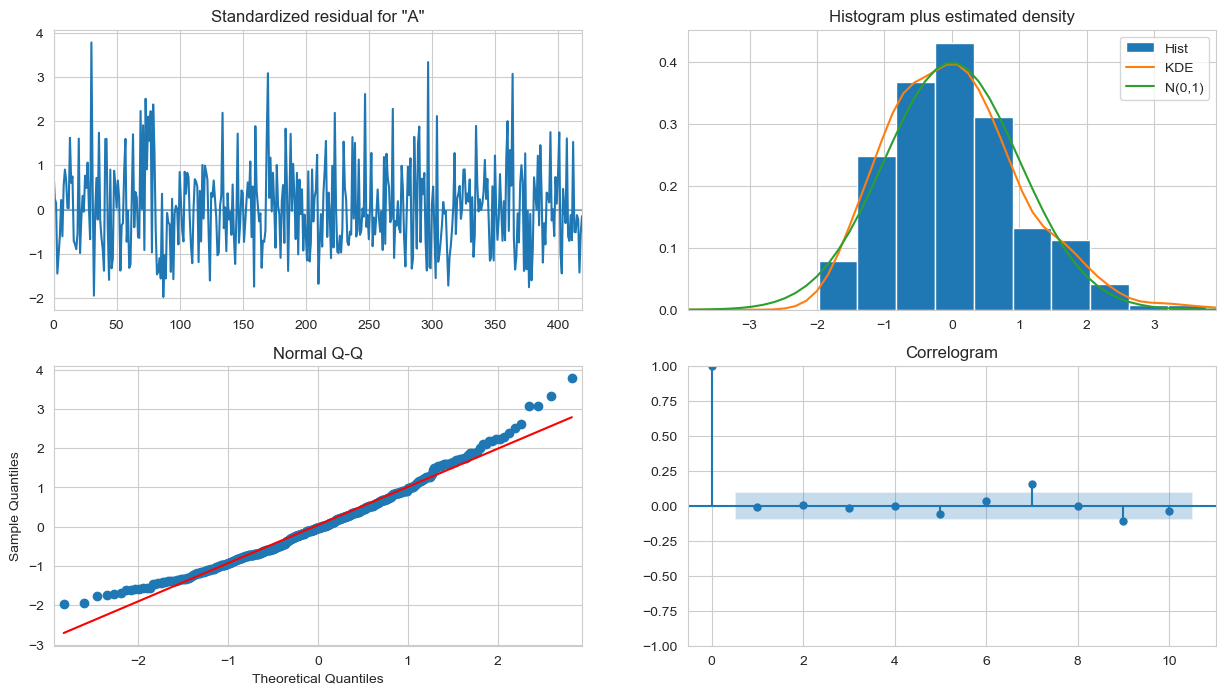

In [52]:
SARIMA_auto_fit.plot_diagnostics(figsize=(15, 8))
plt.show()

#### SARIMA Auto Estimation Forecasting

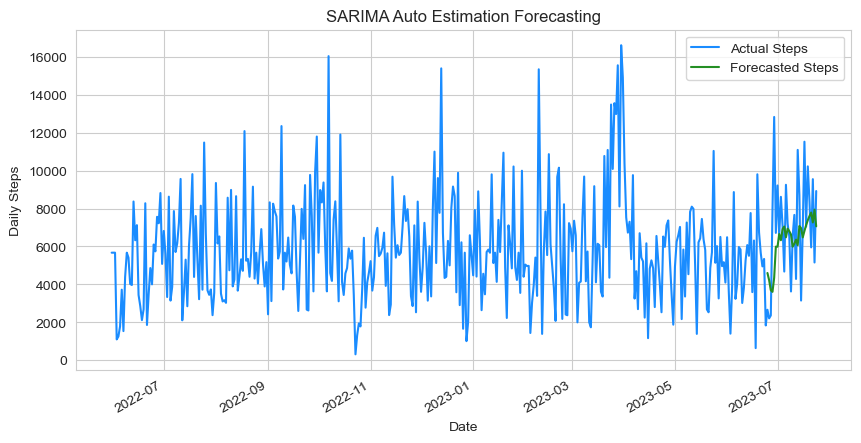

In [53]:
SARIMA_auto_df = combined_df.copy()

# Make predictions
SARIMA_auto_df['SARIMA_auto_predicted'] = SARIMA_auto_fit.predict(start=pd.to_datetime('2023-06-25'), end=combined_df.index.max())

# Create the plot
SARIMA_auto_df[['Actual','SARIMA_auto_predicted']].plot(figsize=(10,5), color=['#1a8cff', '#248f24'])

plt.xlabel('Date')
plt.ylabel('Daily Steps');
plt.title("SARIMA Auto Estimation Forecasting")
plt.legend(['Actual Steps', 'Forecasted Steps']);
plt.show()

#### SARIMA Auto Estimation Statistics

In [54]:
SARIMA_auto_df['SARIMA_auto_predicted'].describe()

count      30.000000
mean     6345.529309
std      1153.070287
min      3609.770114
25%      6010.919720
50%      6644.736354
75%      7061.091263
max      7942.655148
Name: SARIMA_auto_predicted, dtype: float64

#### SARIMA Auto Estimation Error Test

In [55]:
# Drop rows with NaN values
SARIMA_auto_df.dropna(subset=['SARIMA_auto_predicted'], inplace=True)

# Calculate the errors
SARIMA_auto_MSE = mean_squared_error(SARIMA_auto_df['Actual'], SARIMA_auto_df['SARIMA_auto_predicted'])
SARIMA_auto_RMSE = np.sqrt(SARIMA_auto_MSE)
SARIMA_auto_MAE = mean_absolute_error(SARIMA_auto_df['Actual'], SARIMA_auto_df['SARIMA_auto_predicted'])
SARIMA_auto_MAPE = mean_absolute_percentage_error(SARIMA_auto_df['Actual'], SARIMA_auto_df['SARIMA_auto_predicted'])

# Print the error results
print(f'Mean Squared Error: {SARIMA_auto_MSE:.2f}')
print(f'Root Mean Squared Error: {SARIMA_auto_RMSE:.2f}')
print(f'Mean Absolute Error: {SARIMA_auto_MAE:.2f}')
print(f'Mean Absolute Percentage Error: {SARIMA_auto_MAPE:.2%}')

Mean Squared Error: 7961430.38
Root Mean Squared Error: 2821.60
Mean Absolute Error: 2183.45
Mean Absolute Percentage Error: 35.50%


### 6.3 Itertools Prediction
* <b>Itertools</b> uses the itertools module to generate different combinations of parameters for the Seasonal ARIMA model.

#### Find Model Parameters Using Itertools

In [56]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA:')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA:
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


#### Compare AIC, BIC, and HQIC Values, and Select the Best Model

In [57]:
# Create the SARIMAX models
model_1 = sm.tsa.statespace.SARIMAX(combined_df['Actual'], order=(0, 0, 1), seasonal_order=(0, 0, 1, 12))
model_2 = sm.tsa.statespace.SARIMAX(combined_df['Actual'], order=(0, 0, 1), seasonal_order=(0, 1, 0, 12))
model_3 = sm.tsa.statespace.SARIMAX(combined_df['Actual'], order=(0, 1, 0), seasonal_order=(0, 1, 1, 12))
model_4 = sm.tsa.statespace.SARIMAX(combined_df['Actual'], order=(0, 1, 0), seasonal_order=(1, 0, 0, 12))

# Fit the models
fit_model_1 = model_1.fit()
fit_model_2 = model_2.fit()
fit_model_3 = model_3.fit()
fit_model_4 = model_4.fit()

# Compare the AIC values
print('AIC values:')
print('Model 1:', fit_model_1.aic)
print('Model 2:', fit_model_2.aic)
print('Model 3:', fit_model_3.aic)
print('Model 4:', fit_model_4.aic)

# Compare the BIC values
print('BIC values:')
print('Model 1:', fit_model_1.bic)
print('Model 2:', fit_model_2.bic)
print('Model 3:', fit_model_3.bic)
print('Model 4:', fit_model_4.bic)

# Compare the HQIC values
print('HQIC values:')
print('Model 1:', fit_model_1.hqic)
print('Model 2:', fit_model_2.hqic)
print('Model 3:', fit_model_3.hqic)
print('Model 4:', fit_model_4.hqic)

#Select Best Model
print('-' * 47)
print('Best model: Model 3 - (0, 1, 0) x (0, 1, 1, 12)')

AIC values:
Model 1: 8200.99832019238
Model 2: 7884.871271234543
Model 3: 7824.744830201793
Model 4: 8027.687150442993
BIC values:
Model 1: 8213.119084326212
Model 2: 7892.893805583351
Model 3: 7832.762456572678
Model 4: 8035.762892282837
HQIC values:
Model 1: 8205.788997283174
Model 2: 7888.045813517141
Model 3: 7827.917739224763
Model 4: 8030.8793562554065
-----------------------------------------------
Best model: Model 3 - (0, 1, 0) x (0, 1, 1, 12)


### 6.3.1 ARIMA Itertools Prediction

In [58]:
# Enter estimated parameters
ARIMA_itertools = ARIMA(combined_df['Actual'], order=(0, 1, 0))

# Fit the ARIMA model
ARIMA_itertools_fit = ARIMA_itertools.fit()

# ARIMA model summary
print(ARIMA_itertools_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 Actual   No. Observations:                  420
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -4013.279
Date:                Tue, 22 Aug 2023   AIC                           8028.557
Time:                        06:18:39   BIC                           8032.595
Sample:                             0   HQIC                          8030.153
                                - 420                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.219e+07   7.66e+05     15.916      0.000    1.07e+07    1.37e+07
Ljung-Box (L1) (Q):                 102.00   Jarque-Bera (JB):                 5.20
Prob(Q):                              0.00   Pr

#### Residuals and Density Plot (ARIMA Itertools Prediction)

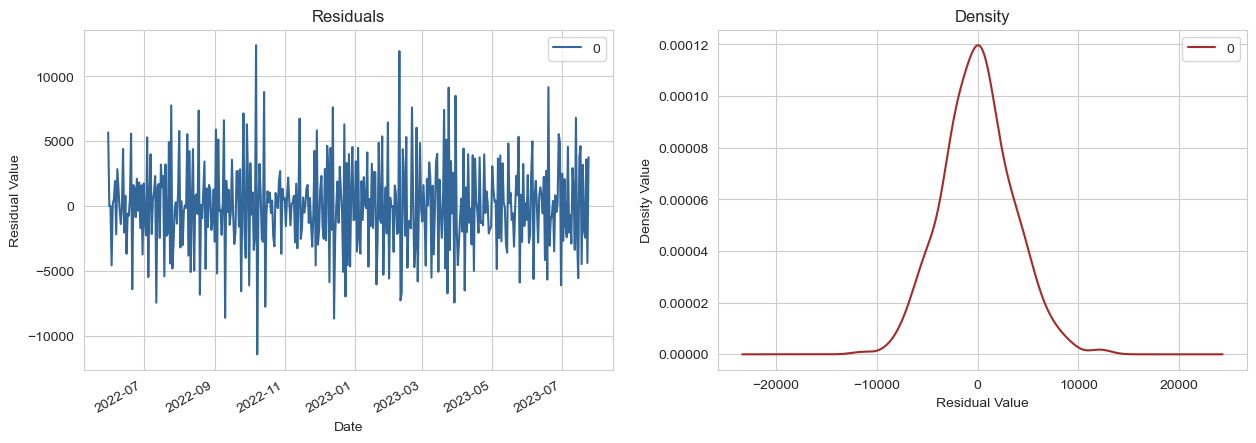

In [59]:
residuals = pd.DataFrame(ARIMA_itertools_fit.resid)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

#Residuals Plot
residuals.plot(title="Residuals", ax=ax[0], color='#336699')
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Residual Value")

#Density Plot
residuals.plot(title="Density", kind="kde", ax=ax[1], color='#a52a2a')
ax[1].set_xlabel("Residual Value")
ax[1].set_ylabel("Density Value")

plt.show()

#### ARIMA Itertools Forecasting

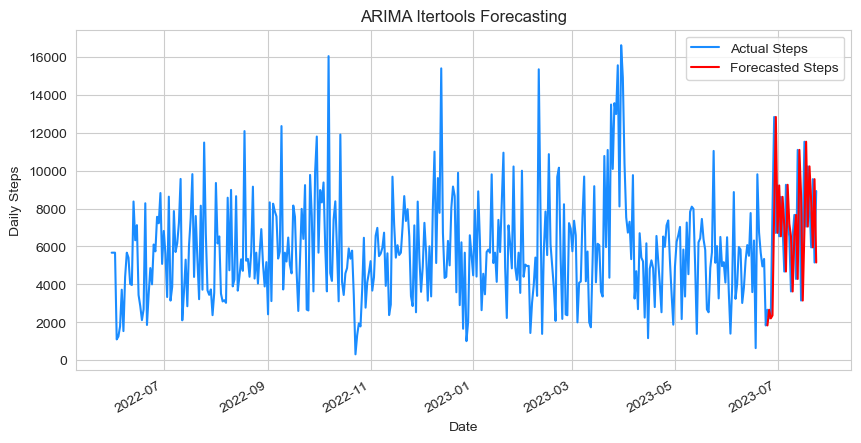

In [60]:
ARIMA_itertools_df = combined_df.copy()

# Make predictions
ARIMA_itertools_df['ARIMA_itertools_predicted'] = ARIMA_itertools_fit.predict(start=pd.to_datetime('2023-06-25'), end=combined_df.index.max())

# Create the plot
ARIMA_itertools_df[['Actual','ARIMA_itertools_predicted']].plot(figsize=(10,5), color=['#1a8cff', '#ff0000'])

plt.xlabel('Date')
plt.ylabel('Daily Steps');
plt.title("ARIMA Itertools Forecasting")
plt.legend(['Actual Steps', 'Forecasted Steps']);
plt.show()

#### ARIMA Itertools Prediction Statistics

In [61]:
ARIMA_itertools_df['ARIMA_itertools_predicted'].describe()

count       30.000000
mean      6849.766667
std       2877.857173
min       1839.000000
25%       4798.500000
50%       6978.500000
75%       8684.000000
max      12829.000000
Name: ARIMA_itertools_predicted, dtype: float64

#### ARIMA Itertools Error Test

In [62]:
# Drop rows with NaN values
ARIMA_itertools_df.dropna(subset=['ARIMA_itertools_predicted'], inplace=True)

# Calculate the errors
ARIMA_itertools_MSE = mean_squared_error(ARIMA_itertools_df['Actual'], ARIMA_itertools_df['ARIMA_itertools_predicted'])
ARIMA_itertools_RMSE = np.sqrt(ARIMA_itertools_MSE)
ARIMA_itertools_MAE = mean_absolute_error(ARIMA_itertools_df['Actual'], ARIMA_itertools_df['ARIMA_itertools_predicted'])
ARIMA_itertools_MAPE = mean_absolute_percentage_error(ARIMA_itertools_df['Actual'], ARIMA_itertools_df['ARIMA_itertools_predicted'])

# Print the error results
print(f'Mean Squared Error: {ARIMA_itertools_MSE:.2f}')
print(f'Root Mean Squared Error: {ARIMA_itertools_RMSE:.2f}')
print(f'Mean Absolute Error: {ARIMA_itertools_MAE:.2f}')
print(f'Mean Absolute Percentage Error: {ARIMA_itertools_MAPE:.2%}')

Mean Squared Error: 12611781.20
Root Mean Squared Error: 3551.31
Mean Absolute Error: 3120.33
Mean Absolute Percentage Error: 47.02%


### 6.3.2 SARIMA Itertools Prediction

In [63]:
# Enter the Estimated Model Parameters
SARIMA_itertools = sm.tsa.statespace.SARIMAX(combined_df['Actual'], order=(0, 1, 0), seasonal_order=(0, 1, 1, 12))

# Fit the ARIMA model
SARIMA_itertools_fit = SARIMA_itertools.fit()

# SARIMA model summary
print(SARIMA_itertools_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                               Actual   No. Observations:                  420
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood               -3910.372
Date:                              Tue, 22 Aug 2023   AIC                           7824.745
Time:                                      06:18:42   BIC                           7832.762
Sample:                                           0   HQIC                          7827.918
                                              - 420                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.9973      0.065    -15.416      0.000      -1.124      -0.871
sigma2      1.195e+

#### Residual, Histogram and Density, Normal Q-Q, and Correlogram Plot (SARIMA Itertools Prediction)

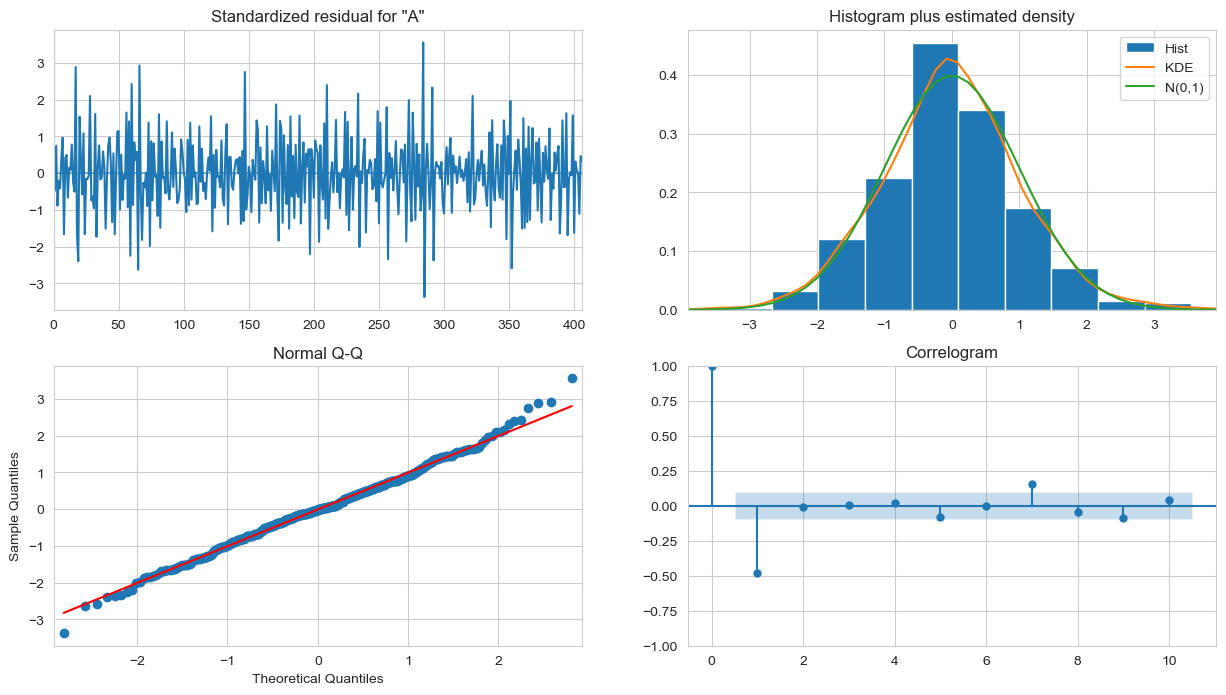

In [64]:
SARIMA_itertools_fit.plot_diagnostics(figsize=(15, 8))
plt.show()

#### SARIMA Itertools Forecasting

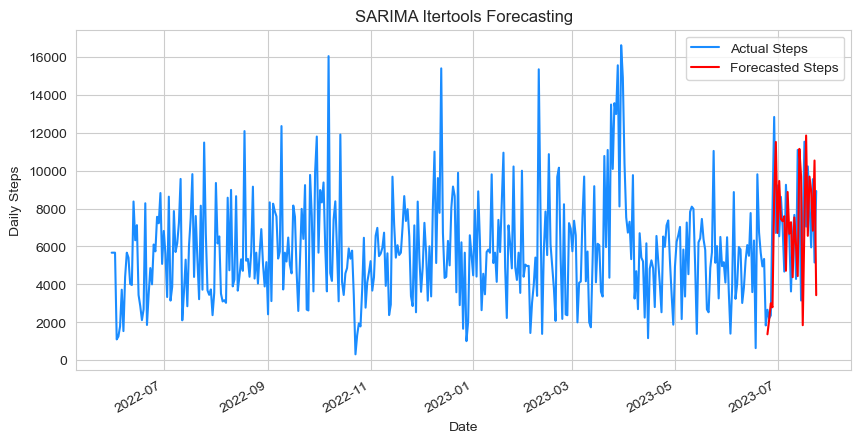

In [65]:
SARIMA_itertools_df = combined_df.copy()

# Make predictions
SARIMA_itertools_df['SARIMA_itertools_predicted'] = SARIMA_itertools_fit.predict(start=pd.to_datetime('2023-06-25'), end=combined_df.index.max())

# Create the plot
SARIMA_itertools_df[['Actual','SARIMA_itertools_predicted']].plot(figsize=(10,5), color=['#1a8cff', '#ff0000'])

plt.xlabel('Date')
plt.ylabel('Daily Steps');
plt.title("SARIMA Itertools Forecasting")
plt.legend(['Actual Steps', 'Forecasted Steps']);
plt.show()

#### SARIMA Itertools Prediction Statistics

In [66]:
SARIMA_itertools_df['SARIMA_itertools_predicted'].describe()

count       30.000000
mean      6855.789629
std       2951.106211
min       1371.600410
25%       4511.463501
50%       7259.634028
75%       8915.460422
max      11850.568684
Name: SARIMA_itertools_predicted, dtype: float64

#### SARIMA Itertools Error Test

In [67]:
# Drop rows with NaN values
SARIMA_itertools_df.dropna(subset=['SARIMA_itertools_predicted'], inplace=True)

# Calculate the errors
SARIMA_itertools_MSE = mean_squared_error(SARIMA_itertools_df['Actual'], SARIMA_itertools_df['SARIMA_itertools_predicted'])
SARIMA_itertools_RMSE = np.sqrt(SARIMA_itertools_MSE)
SARIMA_itertools_MAE = mean_absolute_error(SARIMA_itertools_df['Actual'], SARIMA_itertools_df['SARIMA_itertools_predicted'])
SARIMA_itertools_MAPE = mean_absolute_percentage_error(SARIMA_itertools_df['Actual'], SARIMA_itertools_df['SARIMA_itertools_predicted'])

# Print the error results
print(f'Mean Squared Error: {SARIMA_itertools_MSE:.2f}')
print(f'Root Mean Squared Error: {SARIMA_itertools_RMSE:.2f}')
print(f'Mean Absolute Error: {SARIMA_itertools_MAE:.2f}')
print(f'Mean Absolute Percentage Error: {SARIMA_itertools_MAPE:.2%}')

Mean Squared Error: 12949033.11
Root Mean Squared Error: 3598.48
Mean Absolute Error: 3041.36
Mean Absolute Percentage Error: 47.33%


### 6.4 Runtime Configuration Parameters (RCP) Prediction
* <b>Runtime Configuration Parameters (RCP):</b> uses the SARIMAX model from the statsmodels library to fit and compare different combinations of parameters for time series forecasting. 

#### Find, Compare, Select Best Model Parameters Using RCP Prediction

In [68]:
from pylab import rcParams

#Find and Compare Model Parameters
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(combined_df['Actual'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{} - BIC:{} - HQIC:{}'.
                  format(param, param_seasonal,
                  results.aic.round(2),
                  results.bic.round(2),
                  results.hqic.round(2))
                 )
        except Exception as e:
            print(f"An exception occurred: {e}")
            continue

#Select Best Model
print('-' * 78)
print('Best model: ARIMA(1, 1, 1)x(1, 1, 1, 12)')

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:8543.68 - BIC:8547.72 - HQIC:8545.28
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:8141.42 - BIC:8149.43 - HQIC:8144.59
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:7888.78 - BIC:7892.79 - HQIC:7890.36
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:7481.47 - BIC:7489.43 - HQIC:7484.62
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:7871.84 - BIC:7879.87 - HQIC:7875.02
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:7717.61 - BIC:7729.64 - HQIC:7722.37
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:7576.82 - BIC:7584.78 - HQIC:7579.97
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:7479.9 - BIC:7491.84 - HQIC:7484.63
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:8338.44 - BIC:8346.51 - HQIC:8341.63
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:7932.07 - BIC:7944.09 - HQIC:7936.83
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:7847.1 - BIC:7855.11 - HQIC:7850.27
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:7432.28 - BIC:7444.21 - HQIC:7437.01
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:7834.31 - BIC:7846.34 - HQIC:7839.07
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:796

### 6.4.1 ARIMA RCP Prediction

In [69]:
# Enter estimated parameters
ARIMA_RCP = ARIMA(combined_df['Actual'], order=(1, 1, 1))

# Fit the ARIMA model
ARIMA_RCP_fit = ARIMA_RCP.fit()

# ARIMA model summary
print(ARIMA_RCP_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 Actual   No. Observations:                  420
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3905.340
Date:                Tue, 22 Aug 2023   AIC                           7816.680
Time:                        06:19:28   BIC                           7828.793
Sample:                             0   HQIC                          7821.468
                                - 420                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0203      0.061      0.334      0.738      -0.099       0.140
ma.L1         -0.8451      0.029    -28.712      0.000      -0.903      -0.787
sigma2      7.926e+06   5.56e+05     14.265      0.0

#### Residuals and Density Plot (ARIMA RCP Prediction)

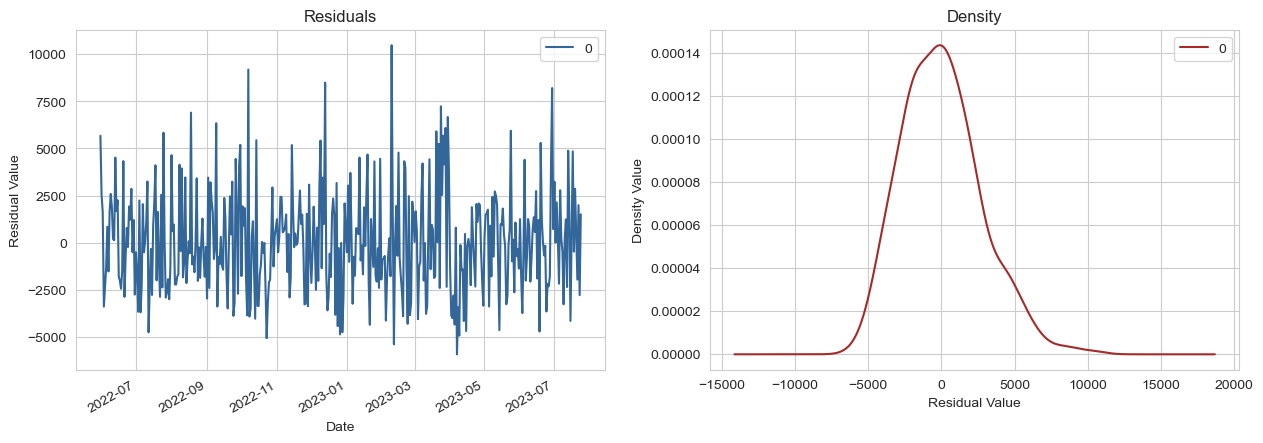

In [70]:
residuals = pd.DataFrame(ARIMA_RCP_fit.resid)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

#Residuals Plot
residuals.plot(title="Residuals", ax=ax[0], color='#336699')
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Residual Value")

#Density Plot
residuals.plot(title="Density", kind="kde", ax=ax[1], color='#a52a2a')
ax[1].set_xlabel("Residual Value")
ax[1].set_ylabel("Density Value")

plt.show()

#### ARIMA RCP Forecasting

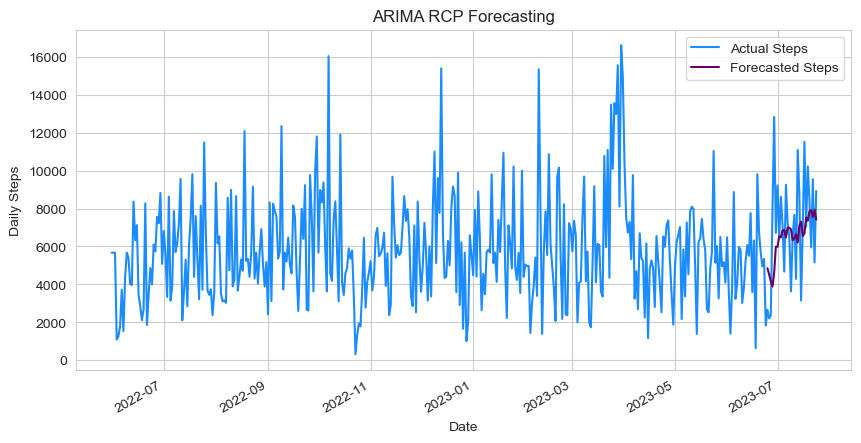

In [71]:
ARIMA_RCP_df = combined_df.copy()

# Make predictions
ARIMA_RCP_df['ARIMA_RCP_predicted'] = ARIMA_RCP_fit.predict(start=pd.to_datetime('2023-06-25'), end=combined_df.index.max())

# Create the plot
ARIMA_RCP_df[['Actual','ARIMA_RCP_predicted']].plot(figsize=(10,5), color=['#1a8cff', '#660066'])

plt.xlabel('Date')
plt.ylabel('Daily Steps');
plt.title("ARIMA RCP Forecasting")
plt.legend(['Actual Steps', 'Forecasted Steps']);
plt.show()

#### ARIMA RCP Prediction Statistics

In [72]:
ARIMA_RCP_df['ARIMA_RCP_predicted'].describe()

count      30.000000
mean     6497.923399
std      1093.763868
min      3887.358976
25%      6240.526838
50%      6661.015429
75%      7253.632622
max      7940.368998
Name: ARIMA_RCP_predicted, dtype: float64

#### ARIMA RCP Error Test

In [73]:
# Drop rows with NaN values
ARIMA_RCP_df.dropna(subset=['ARIMA_RCP_predicted'], inplace=True)

# Calculate the errors
ARIMA_RCP_MSE = mean_squared_error(ARIMA_RCP_df['Actual'], ARIMA_RCP_df['ARIMA_RCP_predicted'])
ARIMA_RCP_RMSE = np.sqrt(ARIMA_RCP_MSE)
ARIMA_RCP_MAE = mean_absolute_error(ARIMA_RCP_df['Actual'], ARIMA_RCP_df['ARIMA_RCP_predicted'])
ARIMA_RCP_MAPE = mean_absolute_percentage_error(ARIMA_RCP_df['Actual'], ARIMA_RCP_df['ARIMA_RCP_predicted'])

# Print the error results
print(f'Mean Squared Error: {ARIMA_RCP_MSE:.2f}')
print(f'Root Mean Squared Error: {ARIMA_RCP_RMSE:.2f}')
print(f'Mean Absolute Error: {ARIMA_RCP_MAE:.2f}')
print(f'Mean Absolute Percentage Error: {ARIMA_RCP_MAPE:.2%}')

Mean Squared Error: 7895358.49
Root Mean Squared Error: 2809.87
Mean Absolute Error: 2183.85
Mean Absolute Percentage Error: 37.00%


### 6.4.2 SARIMA RCP Prediction

In [74]:
# Enter the Estimated Model Parameters
SARIMA_RCP = sm.tsa.statespace.SARIMAX(combined_df['Actual'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Fit the ARIMA model
SARIMA_RCP_fit = SARIMA_RCP.fit()

# SARIMA model summary
print(SARIMA_RCP_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                             Actual   No. Observations:                  420
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -3806.758
Date:                            Tue, 22 Aug 2023   AIC                           7623.517
Time:                                    06:19:32   BIC                           7643.561
Sample:                                         0   HQIC                          7631.449
                                            - 420                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0070      0.058      0.119      0.905      -0.107       0.121
ma.L1         -0.8303      0.030   

#### Residual, Histogram and Density, Normal Q-Q, and Correlogram Plot (SARIMA RCP Prediction)

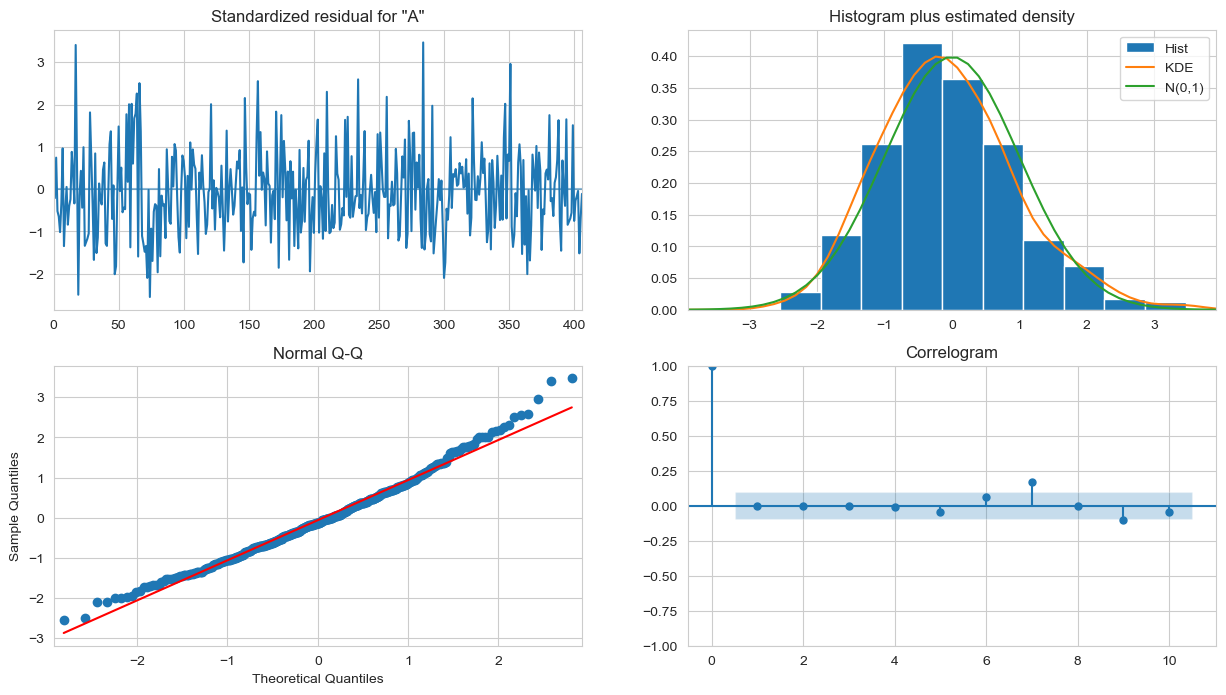

In [75]:
SARIMA_RCP_fit.plot_diagnostics(figsize=(15, 8))
plt.show()

#### SARIMA RCP Forecasting

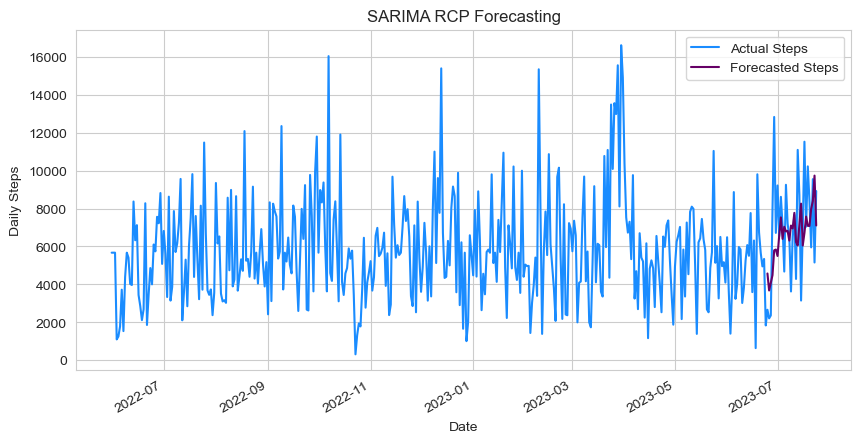

In [76]:
SARIMA_RCP_df = combined_df.copy()

# Make predictions
SARIMA_RCP_df['SARIMA_RCP_predicted'] = SARIMA_RCP_fit.predict(start=pd.to_datetime('2023-06-25'), end=combined_df.index.max())

# Create the plot
SARIMA_RCP_df[['Actual','SARIMA_RCP_predicted']].plot(figsize=(10,5), color=['#1a8cff', '#660066'])

plt.xlabel('Date')
plt.ylabel('Daily Steps');
plt.title("SARIMA RCP Forecasting")
plt.legend(['Actual Steps', 'Forecasted Steps']);
plt.show()

#### SARIMA RCP Prediction Statistics

In [77]:
SARIMA_RCP_df['SARIMA_RCP_predicted'].describe()

count      30.000000
mean     6623.845515
std      1303.359627
min      3682.525612
25%      6053.124813
50%      6810.709692
75%      7125.224438
max      9737.531032
Name: SARIMA_RCP_predicted, dtype: float64

#### SARIMA RCP Error Test

In [78]:
# Drop rows with NaN values
SARIMA_RCP_df.dropna(subset=['SARIMA_RCP_predicted'], inplace=True)

# Calculate the errors
SARIMA_RCP_MSE = mean_squared_error(SARIMA_RCP_df['Actual'], SARIMA_RCP_df['SARIMA_RCP_predicted'])
SARIMA_RCP_RMSE = np.sqrt(SARIMA_RCP_MSE)
SARIMA_RCP_MAE = mean_absolute_error(SARIMA_RCP_df['Actual'], SARIMA_RCP_df['SARIMA_RCP_predicted'])
SARIMA_RCP_MAPE = mean_absolute_percentage_error(SARIMA_RCP_df['Actual'], SARIMA_RCP_df['SARIMA_RCP_predicted'])

# Print the error results
print(f'Mean Squared Error: {SARIMA_RCP_MSE:.2f}')
print(f'Root Mean Squared Error: {SARIMA_RCP_RMSE:.2f}')
print(f'Mean Absolute Error: {SARIMA_RCP_MAE:.2f}')
print(f'Mean Absolute Percentage Error: {SARIMA_RCP_MAPE:.2%}')

Mean Squared Error: 7781029.29
Root Mean Squared Error: 2789.45
Mean Absolute Error: 2174.20
Mean Absolute Percentage Error: 36.95%


## 7. Evaluate Predicted Models

### 7.1 Comparing ARIMA Forecasted Models

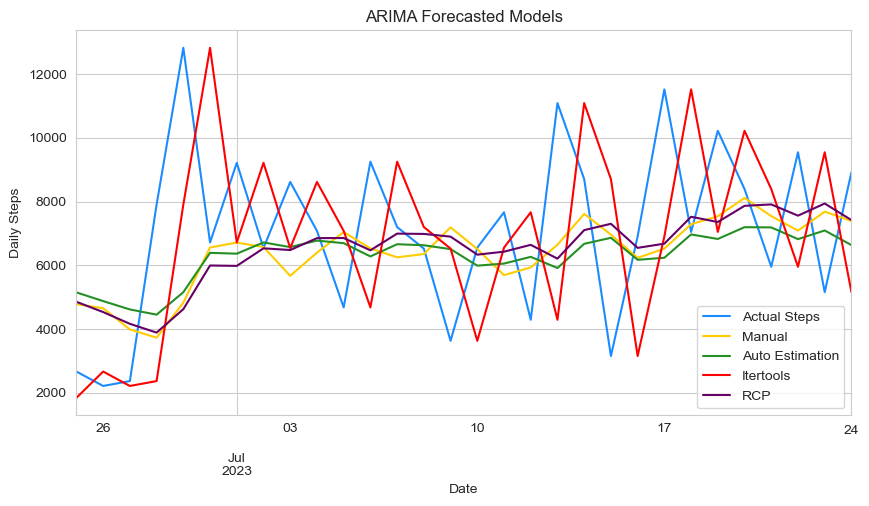

In [79]:
ARIMA_df = combined_df.copy()

# Make predictions
ARIMA_df['ARIMA_manual_predicted'] = ARIMA_manual_fit.predict(start=pd.to_datetime('2023-06-25'), end=combined_df.index.max())
ARIMA_df['ARIMA_auto_predicted'] = ARIMA_auto_fit.predict(start=pd.to_datetime('2023-06-25'), end=combined_df.index.max())
ARIMA_df['ARIMA_itertools_predicted'] = ARIMA_itertools_fit.predict(start=pd.to_datetime('2023-06-25'), end=combined_df.index.max())
ARIMA_df['ARIMA_RCP_predicted'] = ARIMA_RCP_fit.predict(start=pd.to_datetime('2023-06-25'), end=combined_df.index.max())

ARIMA_df.dropna(subset=['ARIMA_manual_predicted', 'ARIMA_auto_predicted', 'ARIMA_itertools_predicted', 'ARIMA_RCP_predicted'], inplace=True)

# Create the plot
ARIMA_df[['Actual', 'ARIMA_manual_predicted', 'ARIMA_auto_predicted', 'ARIMA_itertools_predicted', 'ARIMA_RCP_predicted']].plot(figsize=(10,5), color=['#1a8cff', '#ffcc00', '#248f24', '#ff0000', '#660066'])


plt.xlabel('Date')
plt.ylabel('Daily Steps');
plt.title("ARIMA Forecasted Models")
plt.legend(['Actual Steps', 'Manual', 'Auto Estimation', 'Itertools', 'RCP']);
plt.show()

### 7.2 Comparing SARIMA Forecasted Models

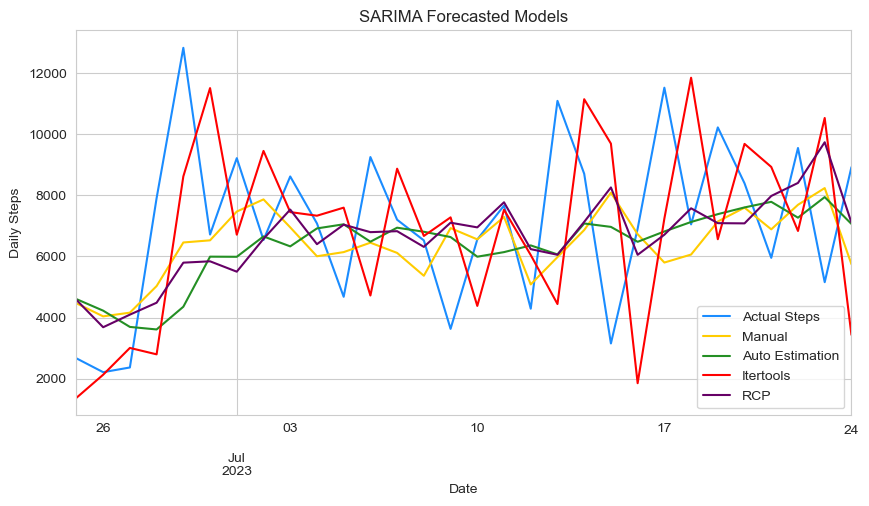

In [80]:
SARIMA_df = combined_df.copy()

# Make predictions
SARIMA_df['SARIMA_manual_predicted'] = SARIMA_manual_fit.predict(start=pd.to_datetime('2023-06-25'), end=combined_df.index.max())
SARIMA_df['SARIMA_auto_predicted'] = SARIMA_auto_fit.predict(start=pd.to_datetime('2023-06-25'), end=combined_df.index.max())
SARIMA_df['SARIMA_itertools_predicted'] = SARIMA_itertools_fit.predict(start=pd.to_datetime('2023-06-25'), end=combined_df.index.max())
SARIMA_df['SARIMA_RCP_predicted'] = SARIMA_RCP_fit.predict(start=pd.to_datetime('2023-06-25'), end=combined_df.index.max())

SARIMA_df.dropna(subset=['SARIMA_manual_predicted', 'SARIMA_auto_predicted', 'SARIMA_itertools_predicted', 'SARIMA_RCP_predicted'], inplace=True)

# Create the plot
SARIMA_df[['Actual', 'SARIMA_manual_predicted', 'SARIMA_auto_predicted', 'SARIMA_itertools_predicted', 'SARIMA_RCP_predicted']].plot(figsize=(10,5), color=['#1a8cff', '#ffcc00', '#248f24', '#ff0000', '#660066'])


plt.xlabel('Date')
plt.ylabel('Daily Steps');
plt.title("SARIMA Forecasted Models")
plt.legend(['Actual Steps', 'Manual', 'Auto Estimation', 'Itertools', 'RCP']);
plt.show()

### 7.3 Comparing All the Models

In [81]:
error_df = pd.DataFrame(
    {
        'ARIMA/SARIMA Models': ['ARIMA Manual', 'ARIMA Auto Estimation', 'ARIMA Itertools', 'ARIMA RCP',
                                'SARIMA Manual', 'SARIMA Auto Estimation', 'SARIMA Itertools', 'SARIMA RCP'],
        'Mean Squared': [ARIMA_manual_MSE.round(2), ARIMA_auto_MSE.round(2), ARIMA_itertools_MSE.round(2), ARIMA_RCP_MSE.round(2),
                        SARIMA_manual_MSE.round(2), SARIMA_auto_MSE.round(2), SARIMA_itertools_MSE.round(2), SARIMA_RCP_MSE.round(2)],
        'Root Mean Squared': [ARIMA_manual_RMSE.round(2), ARIMA_auto_RMSE.round(2), ARIMA_itertools_RMSE.round(2), ARIMA_RCP_RMSE.round(2),
                             SARIMA_manual_RMSE.round(2), SARIMA_auto_RMSE.round(2), SARIMA_itertools_RMSE.round(2), SARIMA_RCP_RMSE.round(2)],
        'Mean Absolute': [ARIMA_manual_MAE.round(2), ARIMA_auto_MAE.round(2), ARIMA_itertools_MAE.round(2), ARIMA_RCP_MAE.round(2),
                         SARIMA_manual_MAE.round(2), SARIMA_auto_MAE.round(2), SARIMA_itertools_MAE.round(2), SARIMA_RCP_MAE.round(2)],
        'Mean Absolute Percentage': [f'{ARIMA_manual_MAPE:.2%}', f'{ARIMA_auto_MAPE:.2%}', f'{ARIMA_itertools_MAPE:.2%}', f'{ARIMA_RCP_MAPE:.2%}',
                                    f'{SARIMA_manual_MAPE:.2%}', f'{SARIMA_auto_MAPE:.2%}', f'{SARIMA_itertools_MAPE:.2%}', f'{SARIMA_RCP_MAPE:.2%}'],
    }
)

error_df

,ARIMA/SARIMA Models,Mean Squared,Root Mean Squared,Mean Absolute,Mean Absolute Percentage
0,ARIMA Manual,7629569.98,2762.17,2148.78,36.16%
1,ARIMA Auto Estimation,7805934.58,2793.91,2223.62,37.46%
2,ARIMA Itertools,12611781.20,3551.31,3120.33,47.02%
3,ARIMA RCP,7895358.49,2809.87,2183.85,37.00%
4,SARIMA Manual,7112199.16,2666.87,2112.31,35.26%
5,SARIMA Auto Estimation,7961430.38,2821.60,2183.45,35.50%
6,SARIMA Itertools,12949033.11,3598.48,3041.36,47.33%
7,SARIMA RCP,7781029.29,2789.45,2174.20,36.95%


#### 7.3.1 Identifying the Best Model
* <b>SARIMA Manual (RMSE: 2666.87):</b> is the best model for the Time Series Analysis of Daily Steps

## 8. Reflections

### 8.1 Decision-Making Process:
* <b>Read and combine CSV files:</b> pandas code was used to read and combine CSV files instead of command-line tools because pandas code was the more efficient, easy, and fast way to read CSV files.<br>
* <b>Replace 0 values with average:</b> In the time series analysis of the daily steps dataset, 0 values were seen as placeholders for missing data. Therefore, the 0 values were replaced with the average in the actual steps column to improve the accuracy of the statistical analysis.<br>
* <b>Seasonal Decomposition:</b> Both additive and multiplicative seasonal decomposition were used to experiment and better understand the time series by observing which decomposition method gives the best results.<br>
* <b>Differencing:</b> Differencing was not peformed since the data was already stationary according to the Augmented Dickey-Fuller (ADF) test.<br>
* <b>Model selection and Forecasting:</b> Multiple methods, such as manual prediction, auto estimation, itertools, and RCP prediction, were used to find the best model parameters for both Arima and SARIMA, and also used to observe and select the method that produced the best results.

### 8.2 What I Learned From The Data
* <b>Visualizing the Data:</b> By plotting the daily steps against the date, I observed the overall trend and other noticeable patterns, such as seasonality or trends.<br>
* <b>Performing Seasonal Decomposition:</b> By decomposing the time series data into trend, seasonality, and residual, I learned to identify trends by observing the direction in which the data was moving and also checking if any repetitive patterns occurred with a fixed frequency.<br>
* <b>Performing Stationarity Tests:</b> By performing statistical tests such as the Augmented Dickey-Fuller (ADF) test. I learned to determine if the data is stationary or not.<br>
* <b>Selecting the Best Model and Forecasting:</b> By using manual prediction, auto estimation, itertools, and RCP prediction, I learned to evaluate different models using both ARIMA and SARIMA and select the best model.<br>
* <b>Evaluating Different Model and Identifying the Best Model:</b> By evaluating the performance of different models using appropriate metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and Mean Absolute Percentage Error (MAPE), I learned to identify the best model for the time series.


### 8.3 What I Will Do Differently Next Time

* <b>Forecasting time series using machine learning and deep learning models like LSTM (Long Short-Term Memory):</b> which is a challenging and interesting task that involves analyzing and predicting the future values of a sequence of data based on its past observations.<br>
* <b>Holt-Winters forecasting:</b> which is a method of time series analysis that uses exponential smoothing to model and predict the behavior of a sequence of values over time.